# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Mpagano\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


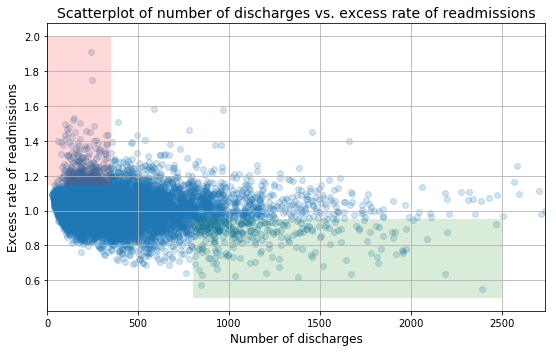

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

## Do you agree with the above analysis and recommendations? Why or why not?

I disagree with the analysis and conclusions for a couple of reasons.  First, while they mention statistically significant correlation, they do not report the correlation level, which is crucial in understanding the magnitude/significance of the findings.  
Secondly, they leave out a lot of data when only examining (or at least reporting) hospitals <100 and >1000.  The data in between those subsets could potentially change the narative or lead to different findings.  
Lastly, the highlighted sections of the scatter plot seem misleading.  The draw the reader's eye to trends that don't actually exist.

### Setup an appropriate hypothesis test.

#### There are two main findings in the conclusion:
#### 1. There is significant correlation between number of discharges and readmission rate.
#### 2. Smaller hospitals in particular have a singificantly higher rate of readmissions.

To test these findings, we will first check for statistically significant correlation between hospital discharge numbers and excess readmission rates.  
We will set up a hypothesis test for part 2.  Precisely, we will compare the mean Excess Readmission Rate for small hospitals and compare that against the entire population of hospitals if we were to randomly select a similarly sized subset.

### Compute and report the observed significance value (or p-value).

In [7]:
import scipy.stats as stats
print('Correlation Coefficient and p-value')
print(stats.pearsonr(x,y))

Correlation Coefficient and p-value
(-0.093095542875904408, 1.5022756426464526e-23)


#### The above output indicates that there is a statisically significant correlation of -0.09 between Number of discharges and readmission rate.  This however is such a low correlation rate that it is generally considered not practical and no correlation.  While the conclusion stated above is technically correct, it is not practical and is misleading.

In [8]:
print(len(x))
print(len(y))

11494
11494


In [48]:
small_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<300]
mean_readmission_small_hospital = np.mean(small_hospitals['Excess Readmission Ratio'])
print('Mean readmission rate of smaller hospitals')
print(mean_readmission)

Mean readmission rate of smaller hospitals
1.0226183501683506


Draw samples from the entire hospital data set of the same size of Small Hospital subset.  Compare the Excess Readmission Ratio to the Small Hospital data set to see if its Mean Excess Readmission Ratio is statistically significant.

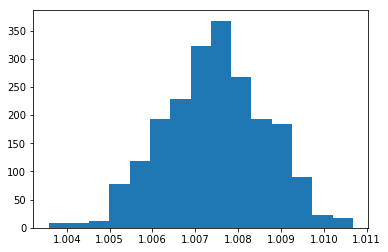

1.00745991069


In [49]:
all_hospital_admissions = clean_hospital_read_df['Excess Readmission Ratio']
all_hospital_admissions.dropna()
sample_means = np.empty(1000)
for i in range(1000):
    rand_sample = np.random.choice(all_hospital_admissions,size = len(small_hospitals))
    sample_means[i] = np.nanmean(rand_sample)
    
plt.hist(sample_means,bins=15,normed=True)
plt.show()
print(np.mean(sample_means))

In [50]:
z_score = ((mean_readmission_small_hospital - np.mean(sample_means))/np.std(sample_means))
print('Z Score')
print(z_score)

import scipy.stats
p_value = scipy.stats.norm.sf(abs(z_score))
print('P Value')
print(p_value)

Z Score
5.7279794479
P Value
5.08169378243e-09


#### The above output shows that the smaller hospitals do have a statistically significant higher Excess Readmission Rate.  However, that does not mean the difference is practically significant.  The sample size is large enough that even small deviations in the means will be deemed statistically significant.  The actual difference between the means (1.023 and 1.008) is not great enough to draw any concrete findings or recommend new plans to decrease the gap.

### Look at the scatterplot above. 
#####     What are the advantages and disadvantages of using this plot to convey information?
#####     Construct another plot that conveys the same information in a more direct manner.

The scatter plot is likely the correct visualization to use, particularly because we are showing the relationship between two variables.  
That said, this scatter plot has a couple of issues that affect the information it is conveying.  First, we saw above that the correlation between the two variables is virtually 0.  It would be helpful to the reader to plot this line so that they can more easily see the relationship (or lack thereof) at play.  Second, the highlighted areas draw the reader's eye to two subsets of the data that do not have a particularly strong relationship.  This technique would be helpful when applied correctly, but in this instance, it was not.

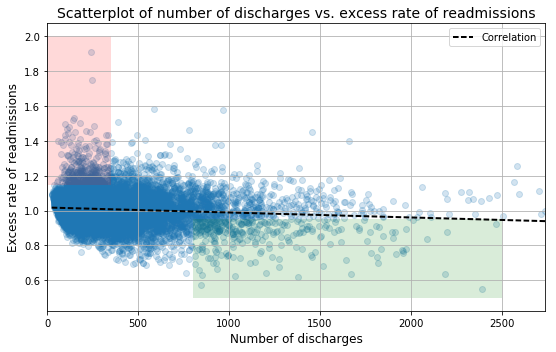

In [64]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

## Plot line overlayed ##
np_x = np.asarray(x)
np_y = np.asarray(y)

m,b = np.polyfit(np_x,np_y,1)
plt.plot(np_x,m*np_x+b,'-', color='black',linestyle = 'dashed',linewidth = 2,label = 'Correlation')
plt.legend()
##

ax.grid(True)
fig.tight_layout()

The easiest way to improve the visualization is to add the correlation level to the plot.  This will show the reader immediately that the level of correlation is so small that it should not be used for policy making in the hospitals.